In [12]:
# get all files from the data directory
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_files = [f for f in os.listdir('data') if f.endswith('.csv')]
total_data = pd.DataFrame()

for file in csv_files:
    data = pd.read_csv('data/' + file, index_col=0)
    total_data = total_data.append(data)

cs_sinppets = total_data.filter(regex='^CS_S_.*')
no_cs_sinppets = total_data.filter(regex='^S_.*')

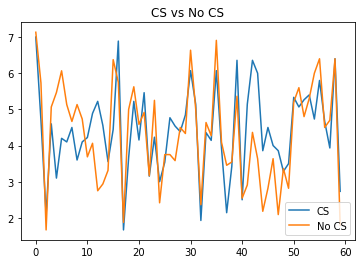

In [22]:
# plot the data


def plot_data(data, title):
    plt.figure()
    plt.title(title)
    plt.plot(data)
    plt.show()

# plot the first column
#plot_data(total_data['preTsk_knows_NS'], 'preTsk_knows_NS')

# average each column of cs_snippets
cs_snippets_means = cs_sinppets.mean()
no_cs_sinppets_means = no_cs_sinppets.mean()

# map the pandas dataframe to a simple array
cs_snippets_means_values = cs_snippets_means.values
no_cs_sinppets_means_values = no_cs_sinppets_means.values
x = list(range(len(cs_snippets_means_values)))

# plot both data sets as lines
plt.figure()
plt.title('CS vs No CS')
plt.plot(x, cs_snippets_means_values, label='CS')
plt.plot(x, no_cs_sinppets_means_values, label='No CS')
plt.legend()
plt.show()
